In [7]:
import itertools
import os
import pathlib
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [8]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
for dirpath, dirnames, filenames in os.walk(r"../Dataset"):
    print(f"{len(dirnames)} dirs and {len(filenames)} images in '{dirpath}'")

4 dirs and 0 images in '../Dataset'
0 dirs and 896 images in '../Dataset\Mild_Demented'
0 dirs and 64 images in '../Dataset\Moderate_Demented'
0 dirs and 3200 images in '../Dataset\Non_Demented'
0 dirs and 2240 images in '../Dataset\Very_Mild_Demented'


In [12]:
data_dir = "../Dataset/"
path_dir = pathlib.Path(data_dir)
class_names = np.array(sorted([item.name for item in path_dir.glob("*")]))
print(class_names)

['Mild_Demented' 'Moderate_Demented' 'Non_Demented' 'Very_Mild_Demented']


In [10]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (128, 128)


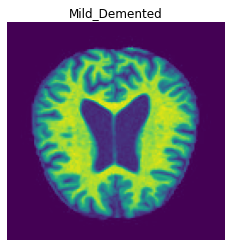

In [13]:
img = view_random_image(data_dir, class_names[0])

Image shape: (128, 128)


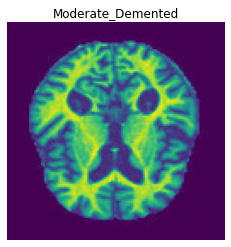

In [14]:
img = view_random_image(data_dir, class_names[1])

Image shape: (128, 128)


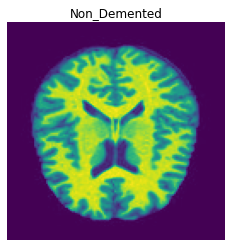

In [15]:
img = view_random_image(data_dir, class_names[2])

Image shape: (128, 128)


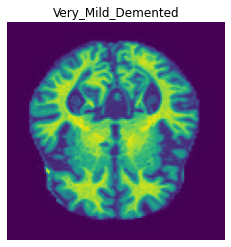

In [16]:
img = view_random_image(data_dir, class_names[3])

In [17]:
# For replicable results
SEED = 0
# Size of the images is (128,128)
IMAGE_SIZE = (128, 128)
# Default batch size
BATCH_SIZE = 32
# Images are grayscale
COLOR_MODE = "grayscale"
# 20% test split
VAL_SPLIT = 0.2

tf.random.set_seed(SEED)
np.random.seed(SEED)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode="categorical",
    validation_split=VAL_SPLIT,
    subset="training",
    seed=SEED,
    color_mode=COLOR_MODE,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=VAL_SPLIT,
    subset="validation",
    label_mode="categorical",
    seed=SEED,
    color_mode=COLOR_MODE,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [18]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True
inputs = tf.keras.layers.Input(shape=(IMAGE_SIZE + (1,)), name="input_layer")
# Efficient net model has the normalizing layer builtin
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(
    len(class_names), activation="softmax", name="output_layer"
)(x)

16705208/16705208 [==============================] - 4s 0us/step


In [19]:
model = tf.keras.Model(inputs, outputs)

In [20]:
LR = 0.001

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    metrics=["accuracy"],
)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________


In [22]:
EPOCHS = 50
history = model.fit(
    train_data, validation_data=valid_data, epochs=EPOCHS, verbose=False
)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [ ]:
model.evaluate(valid_data)

In [ ]:
model.save("./model.h5")